[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


Retorno de 14.11%


C:\Users\Aluno 7\AppData\Local\Temp\ipykernel_6596\4143194592.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = cotacao_ibov['Adj Close'][0] / cotacao_ibov['Adj Close'][-1] - 1


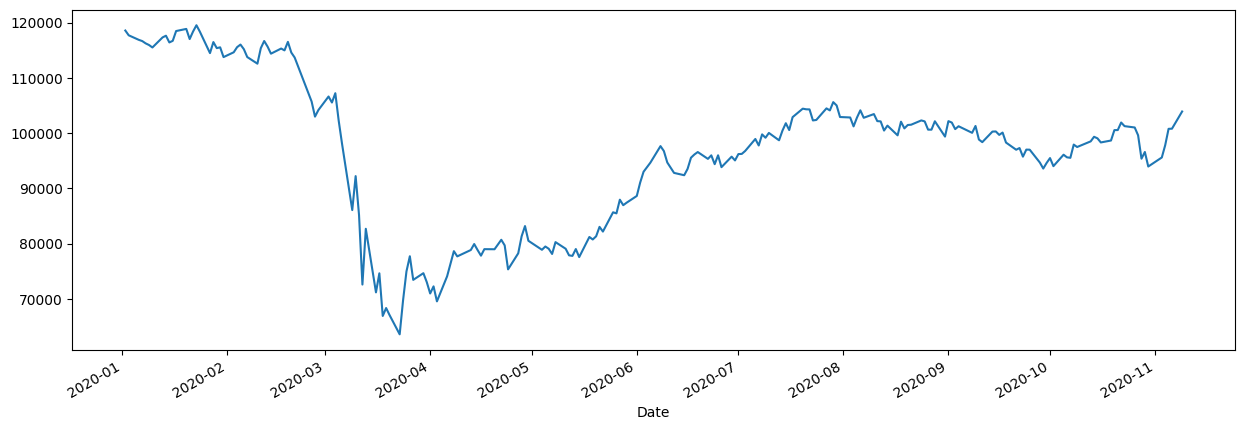

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as web
from IPython.display import display

cotacao_ibov = web.download('^BVSP', start='2020-01-01', end='2020-11-10')

display(cotacao_ibov)
cotacao_ibov['Adj Close'].plot(figsize=(15,5))

retorno_ibov = cotacao_ibov['Adj Close'][0] / cotacao_ibov['Adj Close'][-1] - 1
print(f'Retorno de {retorno_ibov:.2%}')

cotacao_ibov['Adj Close'].plot(figsize=(15,5), label= 'IBOV')